## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image
import h5py


## Create the model 

## Without Dropout 2*Conv

In [7]:
def createClassifier():
    classifier = Sequential()

    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 7, activation = 'softmax')) # number of classes

    return classifier

In [8]:
model = createClassifier()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
Total para

In [9]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229

Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/50
52/52 [==============================] - 34s 649ms/step - loss: 1.9564 - acc: 0.2111 - val_loss: 1.8481 - val_acc: 0.2934
Epoch 2/50
52/52 [==============================] - 37s 703ms/step - loss: 1.7530 - acc: 0.3391 - val_loss: 1.6542 - val_acc: 0.3582
Epoch 3/50
52/52 [==============================] - 37s 720ms/step - loss: 1.6061 - acc: 0.4030 - val_loss: 1.5763 - val_acc: 0.4400
Epoch 4/50
52/52 [==============================] - 37s 715ms/step - loss: 1.4954 - acc: 0.4750 - val_loss: 1.5439 - val_acc: 0.4600
Epoch 5/50
52/52 [==============================] - 34s 658ms/step - loss: 1.4224 - acc: 0.4925 - val_loss: 1.5385 - val_acc: 0.4727
Epoch 6/50
52/52 [==============================] - 35s 680ms/step - loss: 1.3326 - acc: 0.5165 - val_loss: 1.4946 - val_acc: 0.4927
Epoch 7/50
52/52 [==============================] - 33s 642ms/step - loss: 1.2959 - acc: 0.5280 - val_loss: 1.4623 - va

Text(0.5,1,'Loss Curves')

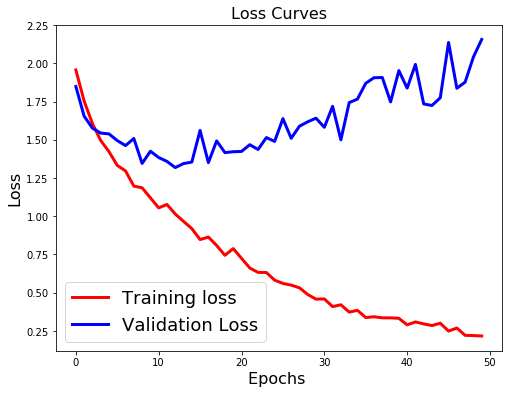

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

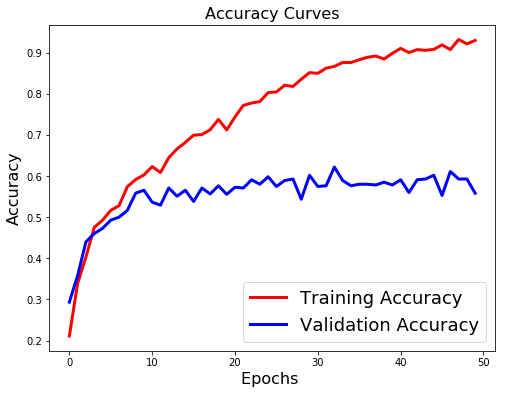

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## With dropout

In [12]:
def createClassifier():
    classifier = Sequential()

    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))



    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 7, activation = 'softmax')) # number of classes

    return classifier

In [13]:
model = createClassifier()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
__________

In [14]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/50
52/52 [==============================] - 33s 631ms/step - loss: 1.9710 - acc: 0.1510 - val_loss: 1.9366 - val_acc: 0.2413
Epoch 2/50
52/52 [==============================] - 37s 714ms/step - loss: 1.8823 - acc: 0.2357 - val_loss: 1.7144 - val_acc: 0.3873
Epoch 3/50
52/52 [==============================] - 37s 720ms/step - loss: 1.7306 - acc: 0.3215 - val_loss: 1.6352 - val_acc: 0.3800
Epoch 4/50
52/52 [==============================] - 36s 695ms/step - loss: 1.6159 - acc: 0.3945 - val_loss: 1.5142 - val_acc: 0.4418
Epoch 5/50
52/52 [==============================] - 36s 693ms/step - loss: 1.5579 - acc: 0.4294 - val_loss: 1.5030 - val_acc: 0.4764
Epoch 6/50
52/52 [==============================] - 34s 660ms/step - loss: 1.4671 - acc: 0.4625 - val_loss: 1.4516 - val_acc: 0.4527
Epoch 7/50
52/52 [==============================] - 33s 632ms/step - loss: 1.3908 - acc: 0.4994 - val_loss: 1.3211 - va

In [90]:
classifier.save('my_model_multiclass7.h5') #save model 


Text(0.5,1,'Loss Curves')

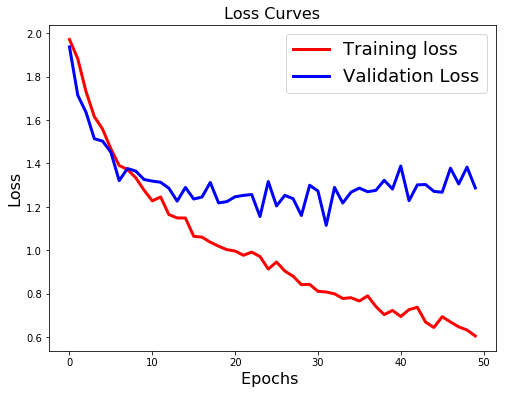

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

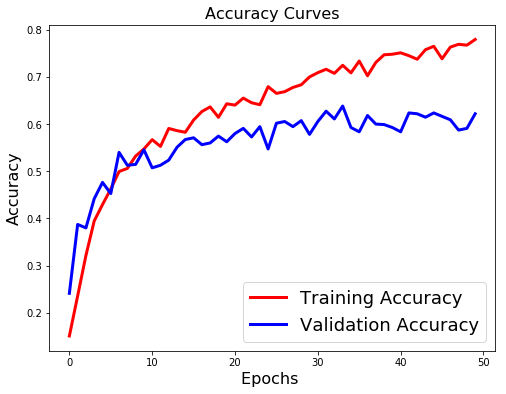

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## add conv

In [22]:
def createClassifier():
    classifier = Sequential()

    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))
    
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 7, activation = 'softmax')) # number of classes

    return classifier

In [18]:
#from keras import optimizers
#model = createClassifier()
#optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [24]:
model = createClassifier()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [25]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/50
52/52 [==============================] - 43s 832ms/step - loss: 1.9583 - acc: 0.1305 - val_loss: 1.9460 - val_acc: 0.1406
Epoch 2/50
52/52 [==============================] - 37s 711ms/step - loss: 1.9486 - acc: 0.1323 - val_loss: 1.9459 - val_acc: 0.1436
Epoch 3/50
52/52 [==============================] - 34s 656ms/step - loss: 1.9462 - acc: 0.1479 - val_loss: 1.9444 - val_acc: 0.1527
Epoch 4/50
52/52 [==============================] - 34s 648ms/step - loss: 1.9444 - acc: 0.1575 - val_loss: 1.9413 - val_acc: 0.1655
Epoch 5/50
52/52 [==============================] - 35s 664ms/step - loss: 1.9306 - acc: 0.1924 - val_loss: 1.8959 - val_acc: 0.2455
Epoch 6/50
52/52 [==============================] - 35s 674ms/step - loss: 1.8356 - acc: 0.2561 - val_loss: 1.7668 - val_acc: 0.2509
Epoch 7/50
52/52 [==============================] - 33s 632ms/step - loss: 1.7531 - acc: 0.3031 - val_loss: 1.6905 - va

Text(0.5,1,'Loss Curves')

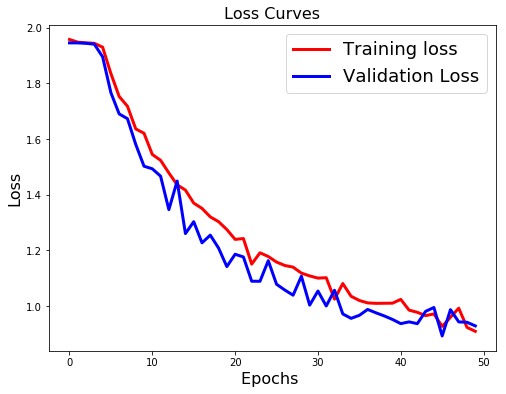

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

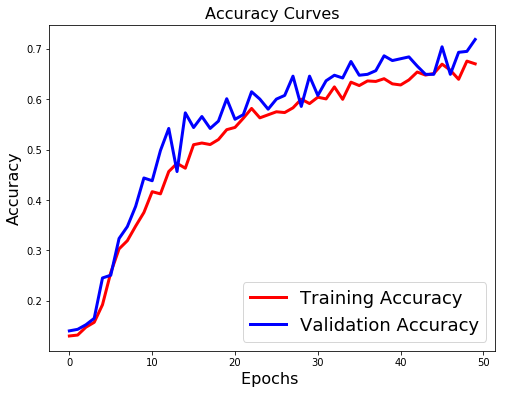

In [29]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 3 conv


In [30]:
def createClassifier():
    classifier = Sequential()

    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

 

    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 7, activation = 'softmax')) # number of classes

    return classifier

In [31]:
from keras import optimizers
model = createClassifier()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [32]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/50
52/52 [==============================] - 42s 799ms/step - loss: 1.9694 - acc: 0.1395 - val_loss: 1.9455 - val_acc: 0.1424
Epoch 2/50
52/52 [==============================] - 54s 1s/step - loss: 1.9435 - acc: 0.1516 - val_loss: 1.9427 - val_acc: 0.1382
Epoch 3/50
52/52 [==============================] - 40s 773ms/step - loss: 1.9416 - acc: 0.1779 - val_loss: 1.9337 - val_acc: 0.2273
Epoch 4/50
52/52 [==============================] - 49s 946ms/step - loss: 1.9048 - acc: 0.2141 - val_loss: 1.8598 - val_acc: 0.3127
Epoch 5/50
52/52 [==============================] - 50s 969ms/step - loss: 1.8161 - acc: 0.2784 - val_loss: 1.7584 - val_acc: 0.3291
Epoch 6/50
52/52 [==============================] - 41s 794ms/step - loss: 1.7385 - acc: 0.3217 - val_loss: 1.6519 - val_acc: 0.3818
Epoch 7/50
52/52 [==============================] - 42s 800ms/step - loss: 1.6528 - acc: 0.3638 - val_loss: 1.5474 - val_a

Text(0.5,1,'Loss Curves')

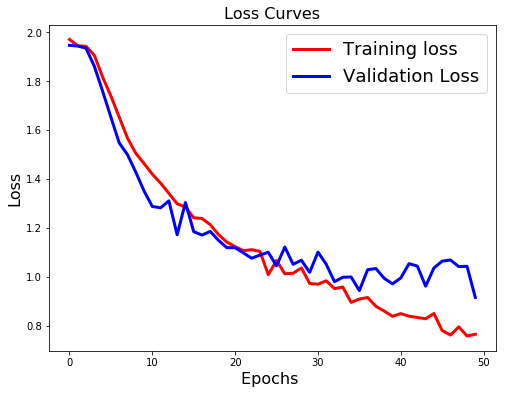

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

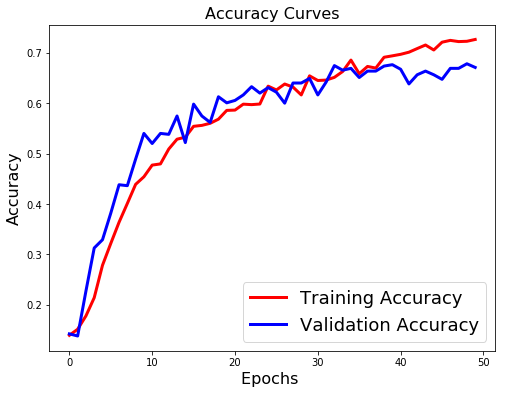

In [34]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [35]:
def createClassifier():
    classifier = Sequential()

    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))

    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Dropout(0.25))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 7, activation = 'softmax')) # number of classes

    return classifier

In [38]:
model = createClassifier()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [39]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 75,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/75
52/52 [==============================] - 36s 696ms/step - loss: 1.9521 - acc: 0.1498 - val_loss: 1.9440 - val_acc: 0.1649
Epoch 2/75
52/52 [==============================] - 38s 739ms/step - loss: 1.9371 - acc: 0.1659 - val_loss: 1.9092 - val_acc: 0.2200
Epoch 3/75
52/52 [==============================] - 39s 746ms/step - loss: 1.8566 - acc: 0.2436 - val_loss: 1.7201 - val_acc: 0.2818
Epoch 4/75
52/52 [==============================] - 38s 733ms/step - loss: 1.7343 - acc: 0.3157 - val_loss: 1.6936 - val_acc: 0.3291
Epoch 5/75
52/52 [==============================] - 42s 800ms/step - loss: 1.6986 - acc: 0.3241 - val_loss: 1.6612 - val_acc: 0.3673
Epoch 6/75
52/52 [==============================] - 41s 784ms/step - loss: 1.6481 - acc: 0.3566 - val_loss: 1.5697 - val_acc: 0.4055
Epoch 7/75
52/52 [==============================] - 36s 701ms/step - loss: 1.5954 - acc: 0.3824 - val_loss: 1.5816 - va

Text(0.5,1,'Loss Curves')

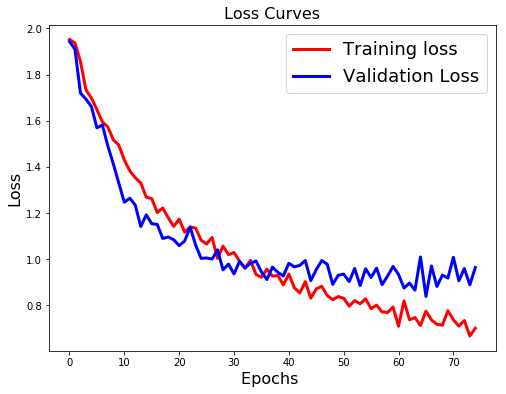

In [40]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

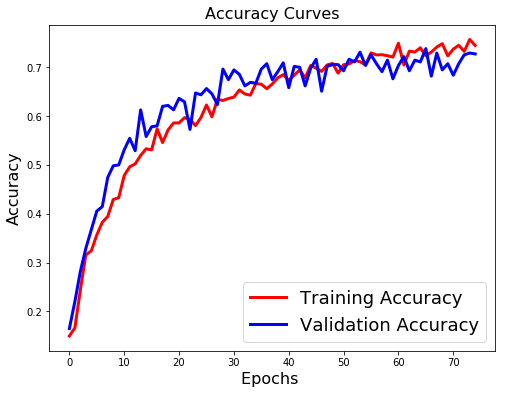

In [41]:

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [43]:
from keras import optimizers
model = createClassifier()
optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [45]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 60,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/60
52/52 [==============================] - 33s 625ms/step - loss: 1.9462 - acc: 0.1407 - val_loss: 1.9444 - val_acc: 0.1719
Epoch 2/60
52/52 [==============================] - 34s 656ms/step - loss: 1.9371 - acc: 0.1894 - val_loss: 1.8895 - val_acc: 0.2455
Epoch 3/60
52/52 [==============================] - 35s 667ms/step - loss: 1.8452 - acc: 0.2604 - val_loss: 1.7343 - val_acc: 0.3164
Epoch 4/60
52/52 [==============================] - 34s 646ms/step - loss: 1.7462 - acc: 0.3115 - val_loss: 1.6361 - val_acc: 0.3491
Epoch 5/60
52/52 [==============================] - 32s 620ms/step - loss: 1.6896 - acc: 0.3338 - val_loss: 1.5615 - val_acc: 0.3655
Epoch 6/60
52/52 [==============================] - 33s 631ms/step - loss: 1.6446 - acc: 0.3463 - val_loss: 1.5449 - val_acc: 0.3982
Epoch 7/60
52/52 [==============================] - 32s 613ms/step - loss: 1.5997 - acc: 0.3729 - val_loss: 1.4493 - va

Text(0.5,1,'Loss Curves')

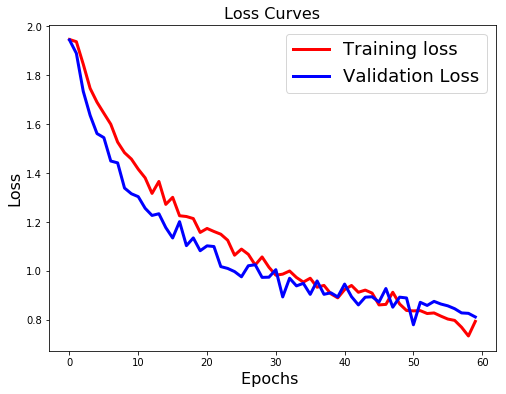

In [46]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

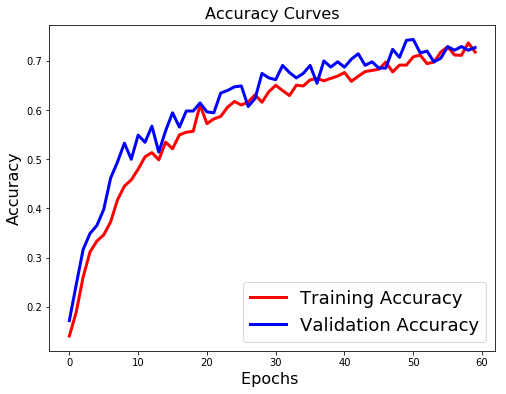

In [48]:

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [50]:
from keras import optimizers
model = createClassifier()
optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [52]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

history =   model.fit_generator(training_set,
                         steps_per_epoch = 1695 // batch_size, # number of training set images, 729
                         epochs = 60,
                         validation_data = test_set,
                         validation_steps = 582 // batch_size) # number of test set images, 229


Found 1695 images belonging to 7 classes.
Found 582 images belonging to 7 classes.
Epoch 1/60
52/52 [==============================] - 35s 682ms/step - loss: 1.1866 - acc: 0.5737 - val_loss: 1.1822 - val_acc: 0.5938
Epoch 2/60
52/52 [==============================] - 35s 670ms/step - loss: 1.1744 - acc: 0.5839 - val_loss: 1.1469 - val_acc: 0.6091
Epoch 3/60
52/52 [==============================] - 34s 645ms/step - loss: 1.1660 - acc: 0.5857 - val_loss: 1.0773 - val_acc: 0.6291
Epoch 4/60
52/52 [==============================] - 34s 653ms/step - loss: 1.1339 - acc: 0.5980 - val_loss: 1.1083 - val_acc: 0.6000
Epoch 5/60
52/52 [==============================] - 33s 644ms/step - loss: 1.1027 - acc: 0.6155 - val_loss: 0.9969 - val_acc: 0.6473
Epoch 6/60
52/52 [==============================] - 33s 644ms/step - loss: 1.1450 - acc: 0.5857 - val_loss: 1.0680 - val_acc: 0.6018
Epoch 7/60
52/52 [==============================] - 32s 617ms/step - loss: 1.0873 - acc: 0.6152 - val_loss: 1.0361 - va

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


NameError: name 'plt' is not defined

Text(0.5,1,'Loss Curves')

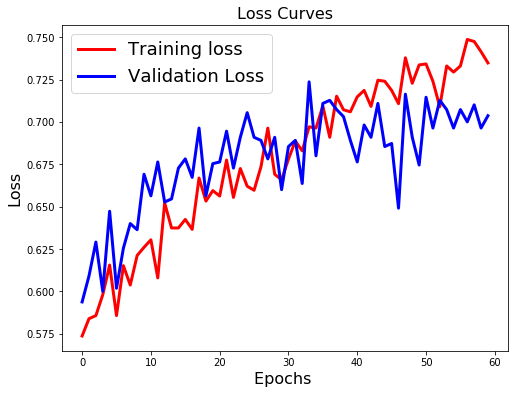

In [55]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


In [19]:
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
import h5py

classifier = load_model('my_model_multiclass7.h5') #load the model that was created using cnn_multiclass.py

test_image = image.load_img('/home/soufiene/yoga-pose-CNN-master/Dataset/Test/fourlimbedstaffpose/00000150.jpg' , target_size = (64, 64)) #folder predictions with images that I want to test
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
 
result = classifier.predict(test_image) # returns array


if result[0][3] == 1:
	prediction = 'childspose' #predictions in array are in alphabetical order
elif result[0][0] == 1:
	prediction = 'CobblersPose'

elif result[0][1] == 1:
	prediction = 'Downwardfacingdog'
elif result[0][2] == 1:
	prediction = 'ExtendedSideAngle'
elif result[0][4] == 1:
	prediction = 'fourlimbedstaffpose'
elif result[0][5] == 1:
	prediction = 'warrior1'
elif result[0][6] == 1:
	prediction = 'warrior2'


print(result)
print(prediction)
test_datagen = ImageDataGenerator(rescale = 1./255)

generator = test_datagen.flow_from_directory(
        'Dataset/Test/',
        target_size=(64, 64),
        batch_size=16,
        class_mode=None,  # only data, no labels
        shuffle=False)  # keep data in same order as labels

probabilities = classifier.predict_generator(generator, 500)

from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 83+ [1] * 83+[2] * 83 + [3] *83 + [4] *83 +[5] *83 )
y_pred = probabilities > 0.5

confusion_matrix(y_true, y_pred)
 

[[0. 0. 0. 0. 1. 0. 0.]]
fourlimbedstaffpose
Found 582 images belonging to 7 classes.


ValueError: Found input variables with inconsistent numbers of samples: [498, 7870]